In [ ]:
from Parse_Validate import parse_and_validate_input_file
from solvers import GRASP
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

import time

script_dir = os.path.dirname(os.path.abspath("__file__"))
data_dir = os.path.join(script_dir, "Datasets")

# file_paths_ex = glob.glob(os.path.join(data_dir, "examples/project.*.dat"))
# real_ex = [0.67, 0.5033333, 0.4666667, -1 , 0.43, 0.55, -1, 0.6083333]

file_paths_50 = glob.glob(os.path.join(data_dir, "n50/custom*.dat"))
real_50 = [0.6181538462, -1 , 0.766025641, -1, 0.770512821 , 0.686538462]

file_paths_55 = glob.glob(os.path.join(data_dir, "n55/custom*.dat"))
real_55 = [ 0.686538462, 0.725416667, 0.777272727, 0.642916667, 0.816666667]


In [2]:
def get_solutions(path, real):
    alpha_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    relative_gaps = []
    for i, file in enumerate(path):
        print(file)
        D, n, N, d, m = parse_and_validate_input_file(file)
        file_gaps = []
        for alpha in alpha_values:
            print(f"Alpha: {alpha}")
            GRASP_solver = GRASP(D, N, n, d, m, alpha=alpha)
            fitness, _ = GRASP_solver.Solve()
            fitness = max(0,fitness)
            relative_gap = (real[i] - fitness ) / real[i] * 100
            file_gaps.append(relative_gap)

        relative_gaps.append(file_gaps)    
    return relative_gaps

relative_gaps = get_solutions(file_paths_55, real_55)

c:\Users\Marc\Desktop\Project-AMMM\Heuristics\Datasets\n55\custom0.dat
Alpha: 0.0
	OBJECTIVE: 0.6410256410256407
	Commission: 24 27 35 36 39 40 42 44 46 51 52 54 55
Alpha: 0.1
	OBJECTIVE: 0.648076923076923
	Commission: 24 27 33 35 36 39 40 42 44 46 51 54 55
Alpha: 0.2
	OBJECTIVE: 0.6525641025641022
	Commission: 24 27 36 39 40 42 44 46 47 51 52 54 55
Alpha: 0.3
	OBJECTIVE: 0.6467948717948717
	Commission: 24 27 33 36 39 40 42 44 46 47 51 52 55
Alpha: 0.4
	OBJECTIVE: 0.6685897435897439
	Commission: 16 17 31 32 33 34 35 37 41 43 48 51 55
Alpha: 0.5
	OBJECTIVE: 0.6653846153846156
	Commission: 9 25 31 32 34 35 36 39 40 47 51 52 54
Alpha: 0.6
	OBJECTIVE: 0.683974358974359
	Commission: 22 25 32 34 35 36 39 40 42 45 51 52 53
Alpha: 0.7
	OBJECTIVE: 0.6685897435897438
	Commission: 8 14 32 33 34 35 40 41 44 46 51 54 55
Alpha: 0.8
	OBJECTIVE: 0.6576923076923078
	Commission: 23 29 33 35 38 40 41 42 44 46 47 51 54
Alpha: 0.9
	OBJECTIVE: 0.6532051282051284
	Commission: 14 16 31 32 34 35 37 39 43 46 47

In [3]:
alpha_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for row in relative_gaps:
    for i, gap in enumerate(row):
        print(f"{alpha_values[i], gap}", end=" ")
    print("\n")

(0.0, 6.629318456794525) (0.1, 5.602240959819236) (0.2, 4.948646189016832) (0.3, 5.788982322905646) (0.4, 2.6143791504366054) (0.5, 3.0812325581526476) (0.6, 0.37348279339971324) (0.7, 2.6143791504366214) (0.8, 4.2016807366711255) (0.9, 4.855275507473546) (1.0, 7.189542546053724) 

(0.0, 100.0) (0.1, 2.067777184575379) (0.2, 2.010338930724635) (0.3, 3.56117178469331) (0.4, 4.365307338602959) (0.5, 2.297530199978125) (0.6, 5.858701938720827) (0.7, 10.396323992925288) (0.8, 9.994256215970433) (0.9, 11.71740383149111) (1.0, 10.338885739074591) 

(0.0, 100.0) (0.1, 3.898635443863064) (0.2, 5.653021409390922) (0.3, 6.822612053076152) (0.4, 7.69980503584011) (0.5, 9.746588662289268) (0.6, 6.725146166102427) (0.7, 7.11500971399751) (0.8, 12.76803115847614) (0.9, 11.598440514790866) (1.0, 16.471734863479377) 

(0.0, 3.564484819927638) (0.1, 1.6850292149396866) (0.2, 1.6202204009745913) (0.3, 5.184702092485216e-08) (0.4, 5.184702092485216e-08) (0.5, 5.184702092485216e-08) (0.6, 5.18470209248521

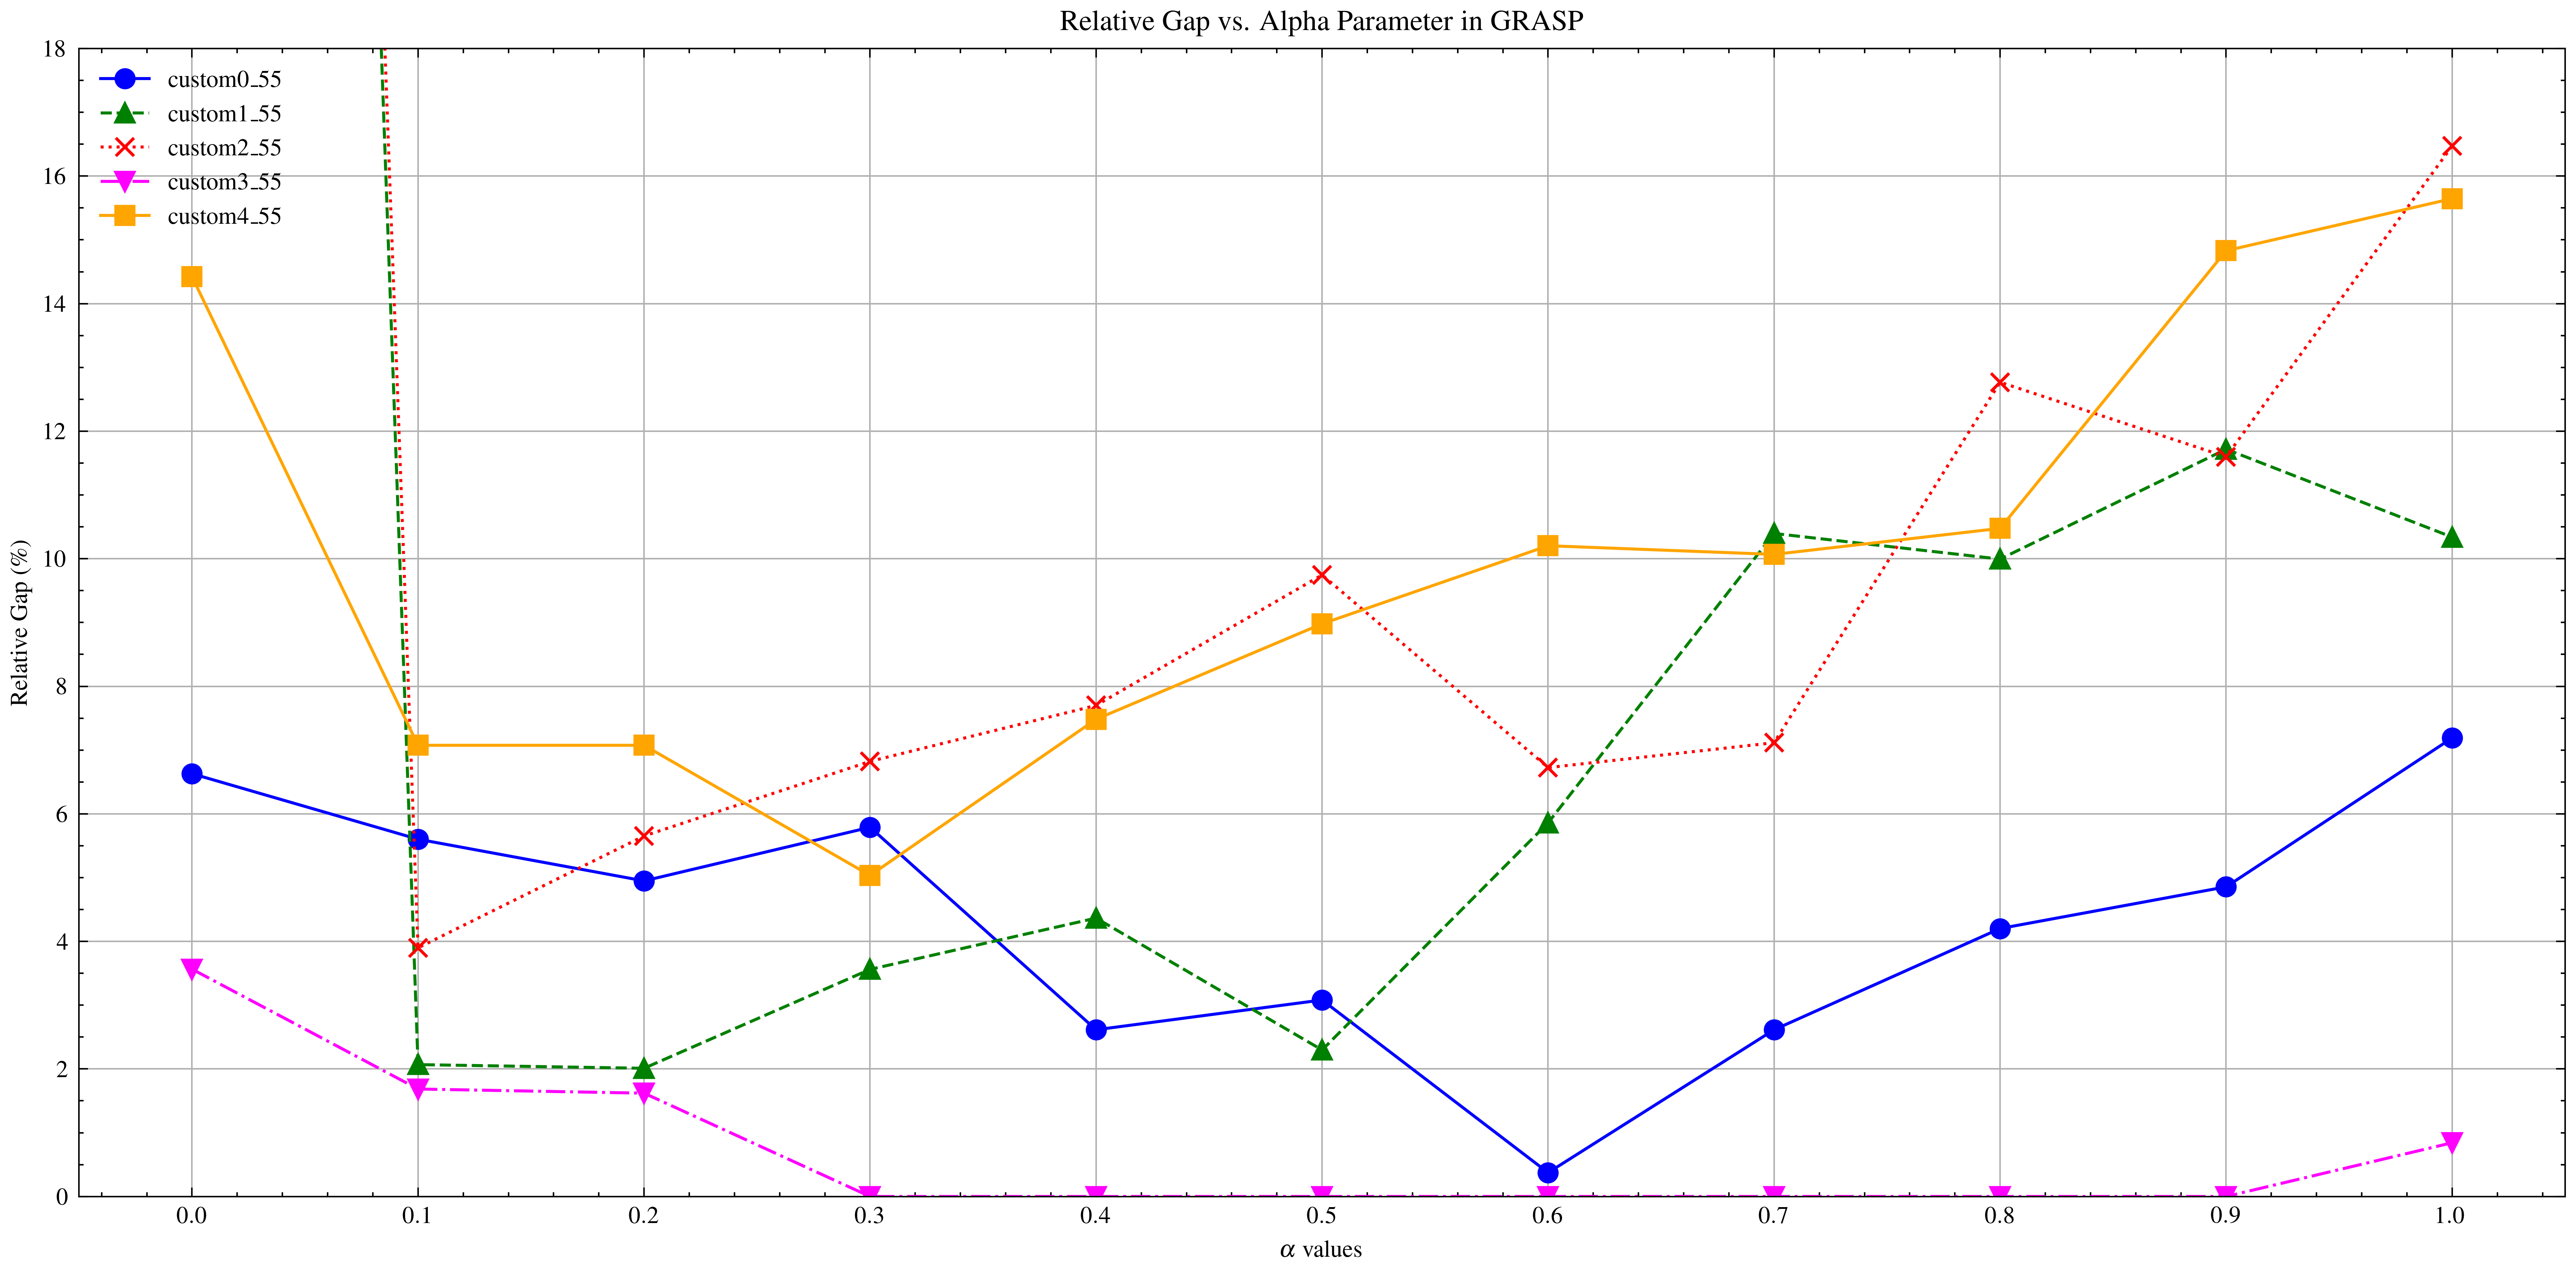

In [10]:
plt.style.use(['science', 'ieee'])

plt.figure(figsize=(12, 6))
#plt.plot(alpha_values, relative_gaps[0], marker='o', label='custom0_50')
#plt.plot(alpha_values, relative_gaps[1] ,marker='o', label='custom1_50')
#plt.plot(alpha_values, relative_gaps[2], marker='o', label='custom2_50')
#plt.plot(alpha_values, relative_gaps[3], marker='o', label='custom3_50')
#plt.plot(alpha_values, relative_gaps[4], marker='o', label='custom4_50')
plt.plot(alpha_values, relative_gaps[0], 'b' ,marker='o', label='custom0_55')
plt.plot(alpha_values, relative_gaps[1] , 'g' ,marker='^', label='custom1_55')
plt.plot(alpha_values, relative_gaps[2], 'r',marker='x', label='custom2_55')
plt.plot(alpha_values, relative_gaps[3], 'magenta',marker='v', label='custom3_55')
plt.plot(alpha_values, relative_gaps[4], 'orange',marker='s', label='custom4_55')

# Add labels, title, and legend
plt.xlabel(r'$\alpha$ values')
plt.ylabel('Relative Gap (\%)')
plt.title('Relative Gap vs. Alpha Parameter in GRASP')
plt.legend(loc='upper left')
plt.xticks(alpha_values)
plt.ylim(0,18)
# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()